## Bar Graph

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Dataset/pizza_delivery.csv")

In [4]:
df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


In [7]:
df.shape

(1266, 12)

In [5]:
df.describe()

,time,temperature,bill,pizzas,free_wine,got_wine,discount_customer
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,34.229551,62.863950,42.755924,3.013428,0.180885,0.148499,0.218009
std,6.461478,6.905708,11.222918,1.467102,0.385075,0.355735,0.413057
min,12.266028,41.758718,9.100000,1.000000,0.000000,0.000000,0.000000
25%,30.061151,58.242364,35.500000,2.000000,0.000000,0.000000,0.000000
50%,34.381964,62.926657,42.900000,3.000000,0.000000,0.000000,0.000000
75%,38.577021,67.228628,50.500000,4.000000,0.000000,0.000000,0.000000
max,53.096264,87.582422,75.000000,11.000000,1.000000,1.000000,1.000000


## Testing Null Values

In [8]:
df.isna().sum()

day                  0
date                 0
time                 0
operator             0
branch               0
driver               0
temperature          0
bill                 0
pizzas               0
free_wine            0
got_wine             0
discount_customer    0
dtype: int64

In [10]:
## total unique drivers

df["driver"].unique()

array(['Bruno', 'Salvatore', 'Mario', 'Luigi', 'Domenico'], dtype=object)

## Create group of Drivers

In [23]:
drivers_df = df.groupby("driver")

In [24]:
drivers_revenue = drivers_df.apply(lambda group:group.bill.sum())

In [25]:
drivers_revenue.rename_axis("Driver Revenue")

Driver Revenue
Bruno        14684.7
Domenico      3095.8
Luigi         5831.0
Mario        15364.6
Salvatore    15152.9
dtype: float64

In [26]:
drivers_revenue

driver
Bruno        14684.7
Domenico      3095.8
Luigi         5831.0
Mario        15364.6
Salvatore    15152.9
dtype: float64

**plot bargraph for driver for drivers revenue**

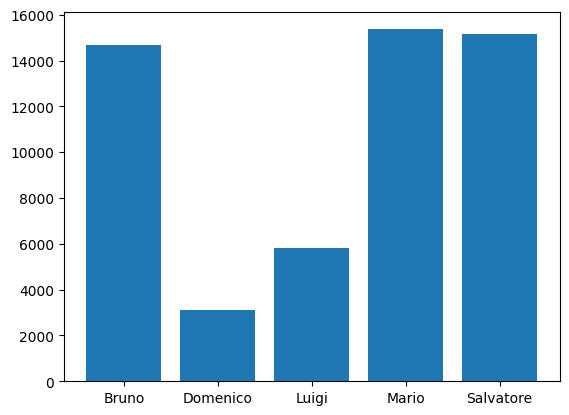

In [28]:
fig, axes = plt.subplots()

axes.bar(drivers_revenue.index, drivers_revenue)
plt.show()

**driver revenue on each branch**

In [29]:
driver_per_branch = drivers_df.apply(lambda group: group.groupby("branch").apply(lambda x:x.bill.sum()))

In [30]:
driver_per_branch

branch,Centre,East,West
driver,,,
Bruno,6346.9,3083.4,5254.4
Domenico,589.1,1766.3,740.4
Luigi,1980.6,2204.9,1645.5
Mario,5157.0,4805.0,5402.6
Salvatore,5757.8,3204.6,6190.5


**over lapping condition**

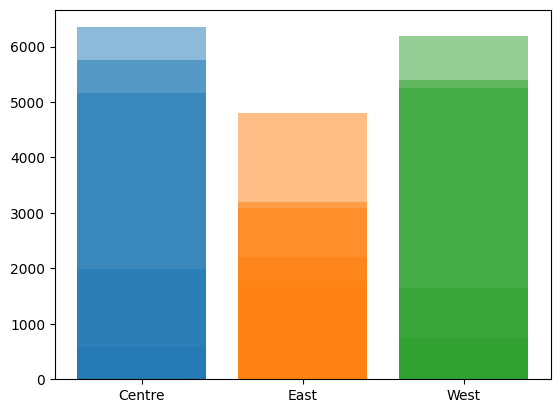

In [33]:
fig , axes = plt.subplots()

for driver, value in driver_per_branch.items():
    axes.bar(driver, value, alpha=0.5)

plt.show()

**Avoiding overlapping problem**

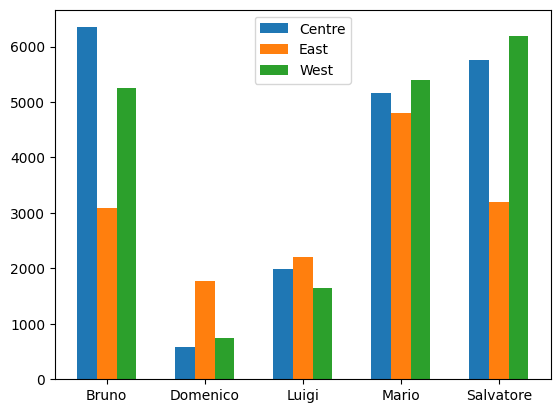

In [40]:
fig, axes = plt.subplots()

labels = np.arange(len(driver_per_branch.index))

wid = 0.2
offset = 0

for driver, values in driver_per_branch.items():
    axes.bar(labels+offset, values, width=wid, label=driver)
    offset += wid

mid_point = labels+(len(driver_per_branch.columns)*wid)/2

axes.set_xticks(mid_point-(wid/2), driver_per_branch.index)

axes.legend()
plt.show()

In [35]:
labels

array([0, 1, 2, 3, 4])